## Preprocessing

In [1]:
  # Import modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# data science
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# ML Helpers/Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Algorithms
from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

# fun ones
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Neural networks
import tensorflow as tf



In [2]:

df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
#IS_successful is the target

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [4]:
df.describe()

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL
count,3.429900e+04,34299.000000,3.429900e+04,34299.000000
mean,5.191852e+08,0.999854,2.769199e+06,0.532406
std,2.451472e+08,0.012073,8.713045e+07,0.498956
min,1.052060e+07,0.000000,5.000000e+03,0.000000
25%,2.748482e+08,1.000000,5.000000e+03,0.000000
50%,4.656317e+08,1.000000,5.000000e+03,1.000000
75%,7.526117e+08,1.000000,7.742000e+03,1.000000
max,9.960869e+08,1.000000,8.597806e+09,1.000000


In [31]:
df.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [5]:
# Drop the non-beneficial ID columns, 'EIN'

df2 = df.drop(columns = ["EIN"])
df2

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...
34294,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [6]:
# Determine the number of unique values in each column.

cat_cols = df2.select_dtypes(exclude=[np.number]).columns

# value counts
for col in cat_cols:
    print(col)
    print(df2[col].nunique())
    print(df2[col].value_counts())
    print()

NAME
19568
PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

APPLICATION_TYPE
17
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7 

In [7]:
#Look at NAME value counts for binning
df2.NAME.value_counts()

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [8]:
from os import name
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
df_name = df2.NAME.value_counts()
name_types_to_replace = list(df_name.loc[df_name <50].index)

# Replace in dataframe
for app in name_types_to_replace:
    df2['NAME'] = df2['NAME'].replace(app,"Other")

# Check to make sure binning was successful
df2['NAME'].value_counts()

Other                                                                 24545
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGUE BASEBALL INC                                              277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                                266
MOMS CLUB   

In [9]:
# Look at APPLICATION_TYPE value counts for binning
df2.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
df_application = df2.APPLICATION_TYPE.value_counts()
application_types_to_replace = list(df_application.loc[df_application <100].index)

# Replace in dataframe
for app in application_types_to_replace:
    df2['APPLICATION_TYPE'] = df2['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
df2['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Look at CLASSIFICATION value counts for binning
df2.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [13]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
df_class = df2.CLASSIFICATION.value_counts()
classifications_to_replace = list(df_class.loc[df_class < 100].index)

# Replace in dataframe
for cls in classifications_to_replace:
    df2['CLASSIFICATION'] = df2['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
df2['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [14]:
# Convert categorical data to numeric with `pd.get_dummies`
df3 = pd.get_dummies(df2)
df3.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AIR FORCE ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CALIFORNIA GARDEN CLUBS INC,NAME_CISD EDUCATIONAL SUPPORT GROUPS INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [15]:
corrs = df3.corr()
corrs["IS_SUCCESSFUL"].sort_values(ascending = False)

IS_SUCCESSFUL                              1.000000
NAME_Other                                 0.388861
AFFILIATION_Independent                    0.368322
ORGANIZATION_Trust                         0.162164
CLASSIFICATION_C7000                       0.110084
                                             ...   
NAME_UNITED STATES BOWLING CONGRESS INC   -0.147406
CLASSIFICATION_C2100                      -0.147895
NAME_TOPS CLUB INC                        -0.155627
ORGANIZATION_Association                  -0.179561
AFFILIATION_CompanySponsored              -0.369379
Name: IS_SUCCESSFUL, Length: 103, dtype: float64

In [16]:
# Split our preprocessed data into our features and target arrays

X = df3.drop(columns=["IS_SUCCESSFUL"])
y = df3["IS_SUCCESSFUL"]

#Split teh preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(25724, 102) (25724,)
(8575, 102) (8575,)


In [17]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
def doMLClassification(model, X_train, y_train, X_test, y_test):
    # fit the model
    model.fit(X_train, y_train)

    # predict the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    test_proba = model.predict_proba(X_test)[:,1]

    # make some pretty graphs
    print("TRAINING SET METRICS")
    print(confusion_matrix(y_train, train_preds))
    print(classification_report(y_train, train_preds))
    print()
    print("TESTING SET METRICS")
    print(confusion_matrix(y_test, test_preds))
    print(classification_report(y_test, test_preds))

    # ROC Curve
    auc = roc_auc_score(y_test, test_proba)
    fpr, tpr, thresholds = roc_curve(y_test, test_proba)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(F"AUC: {auc}")
    plt.show()

TRAINING SET METRICS
[[ 7318  4710]
 [ 1441 12255]]
              precision    recall  f1-score   support

           0       0.84      0.61      0.70     12028
           1       0.72      0.89      0.80     13696

    accuracy                           0.76     25724
   macro avg       0.78      0.75      0.75     25724
weighted avg       0.78      0.76      0.75     25724


TESTING SET METRICS
[[2369 1641]
 [ 506 4059]]
              precision    recall  f1-score   support

           0       0.82      0.59      0.69      4010
           1       0.71      0.89      0.79      4565

    accuracy                           0.75      8575
   macro avg       0.77      0.74      0.74      8575
weighted avg       0.76      0.75      0.74      8575



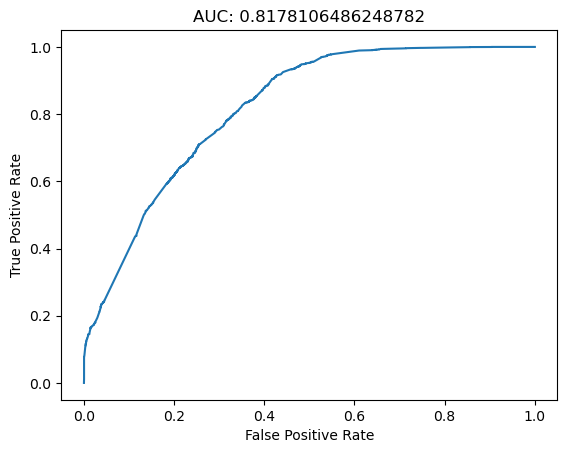

In [19]:
 # init the model LR
lr = LogisticRegression()
doMLClassification(lr, X_train_scaled, y_train, X_test_scaled, y_test)

In [20]:
# LR - Precision is pretty low, testing model and training model only 72% and 73% accuracy at predicting outcome. Recall is low as well, F1 score indicating this is not a good model in term of prediction. AUC score of .75, not recommended model.

TRAINING SET METRICS
[[ 9119  2909]
 [  917 12779]]
              precision    recall  f1-score   support

           0       0.91      0.76      0.83     12028
           1       0.81      0.93      0.87     13696

    accuracy                           0.85     25724
   macro avg       0.86      0.85      0.85     25724
weighted avg       0.86      0.85      0.85     25724


TESTING SET METRICS
[[2555 1455]
 [ 719 3846]]
              precision    recall  f1-score   support

           0       0.78      0.64      0.70      4010
           1       0.73      0.84      0.78      4565

    accuracy                           0.75      8575
   macro avg       0.75      0.74      0.74      8575
weighted avg       0.75      0.75      0.74      8575



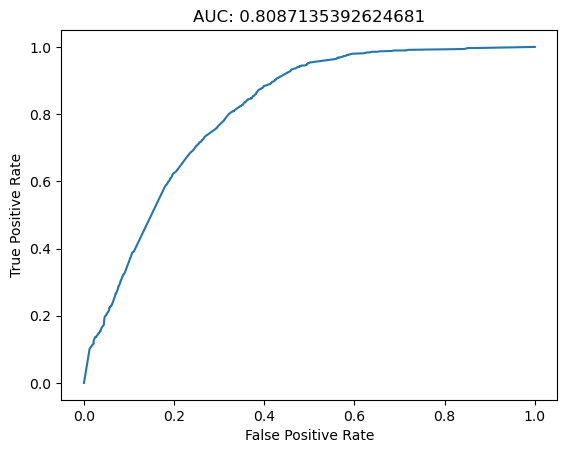

In [21]:
# init the model
rf = RandomForestClassifier(random_state=42)
doMLClassification(rf, X_train_scaled, y_train, X_test_scaled, y_test)

In [22]:
#Random forest: the testing model did a lousy job in predicting the results. not recommended.

[LightGBM] [Info] Number of positive: 13696, number of negative: 12028
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 546
[LightGBM] [Info] Number of data points in the train set: 25724, number of used features: 98
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532421 -> initscore=0.129867
[LightGBM] [Info] Start training from score 0.129867
TRAINING SET METRICS
[[ 7545  4483]
 [ 1256 12440]]
              precision    recall  f1-score   support

           0       0.86      0.63      0.72     12028
           1       0.74      0.91      0.81     13696

    accuracy                           0.78     25724
   macro avg       0.80      0.77      0.77     25724
weighted avg       0.79      0.78      0.77     25724


TESTING SET METRICS
[[2400 1610]
 [ 464 4101]]
              p

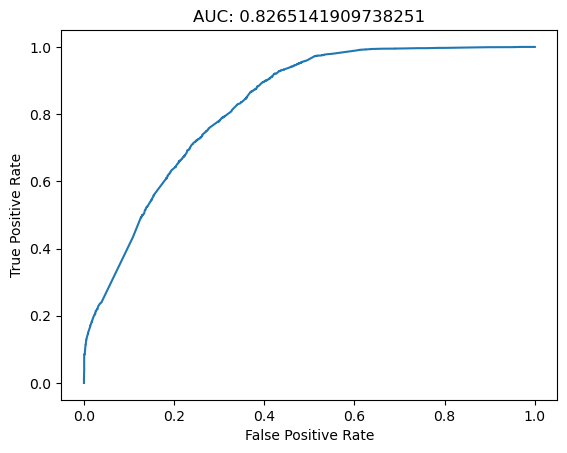

In [23]:
# init the model
lgb = LGBMClassifier(random_state=42)
doMLClassification(lgb, X_train_scaled, y_train, X_test_scaled, y_test)

In [24]:
len(X_train.columns)

102

In [25]:
X_train.columns

Index(['STATUS', 'ASK_AMT', 'NAME_AIR FORCE ASSOCIATION',
       'NAME_ALPHA PHI SIGMA',
       'NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES',
       'NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC',
       'NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN',
       'NAME_CALIFORNIA GARDEN CLUBS INC',
       'NAME_CISD EDUCATIONAL SUPPORT GROUPS INC',
       'NAME_CIVITAN INTERNATIONAL',
       ...
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M',
       'SPECIAL_CONSIDERATIONS_N', 'SPECIAL_CONSIDERATIONS_Y'],
      dtype='object', length=102)

## Compile, Train and Evaluate the Model

In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

number_input_features = len(X_train.columns)
hidden_nodes_layer1 = 20
hidden_nodes_layer2 = 12
hidden_nodes_layer3 = 6
nn = tf.keras.models.Sequential()

# First hidden layer

nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer1, activation = 'relu', input_dim = number_input_features))
# Second hidden layer

nn.add(tf.keras.layers.Dense(hidden_nodes_layer2, activation="sigmoid"))

nn.add(tf.keras.layers.Dense(hidden_nodes_layer3, activation="sigmoid"))

# Output layer

nn.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                2060      
                                                                 
 dense_1 (Dense)             (None, 12)                252       
                                                                 
 dense_2 (Dense)             (None, 6)                 78        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 2397 (9.36 KB)
Trainable params: 2397 (9.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train,epochs=50)

Epoch 1/50
804/804 [==============================] - 3s 2ms/step - loss: 0.5526 - accuracy: 0.7362
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.4954 - accuracy: 0.7645
Epoch 3/50
804/804 [==============================] - 1s 2ms/step - loss: 0.4869 - accuracy: 0.7661
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.4830 - accuracy: 0.7674
Epoch 5/50
804/804 [==============================] - 1s 2ms/step - loss: 0.4802 - accuracy: 0.7697
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.4781 - accuracy: 0.7699
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.4769 - accuracy: 0.7691
Epoch 8/50
804/804 [==============================] - 1s 2ms/step - loss: 0.4757 - accuracy: 0.7703
Epoch 9/50
804/804 [==============================] - 2s 2ms/step - loss: 0.4748 - accuracy: 0.7704
Epoch 10/50
804/804 [==============================] - 2s 2ms/step - loss: 0.4739 - accuracy: 0.7714

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4795 - accuracy: 0.7586 - 382ms/epoch - 1ms/step
Loss: 0.47951820492744446, Accuracy: 0.7586005926132202


In [30]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity_Optimization.h5')

C:\Users\Home\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
